# **EDA Parametrized Data**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
DATA_PATH = r"C:\Users\Ale\Downloads\Jade\Ale\Data_Parametrizada\EEG_features_final.csv"
df = pd.read_csv(DATA_PATH)
df = df.select_dtypes(include=[np.number])
X = df.drop(columns=["Age"])
y = df["Age"]

print(f" Loaded {len(X)} samples, {X.shape[1]} features.")


 Loaded 510 samples, 9 features.


In [5]:
df.head()

,Delta,Theta,Alpha,Beta,Gamma,Age,Slope,Offset,Skewness,Kurtosis
0,0.155923,0.042459,0.019086,0.008909,0.003071,23,-1.347291,-0.841321,1.303254,-0.038977
1,0.156750,0.036695,0.029538,0.007126,0.002293,29,-1.441744,-0.670983,1.306995,-0.005492
2,0.126810,0.029395,0.035800,0.010548,0.003723,29,-1.164792,-1.171950,1.242626,-0.084860
3,0.140082,0.037343,0.025054,0.006243,0.001189,28,-1.600830,-0.519898,1.263950,-0.070367
4,0.138523,0.051683,0.020942,0.010037,0.002060,22,-1.414933,-0.709676,1.121547,-0.326115


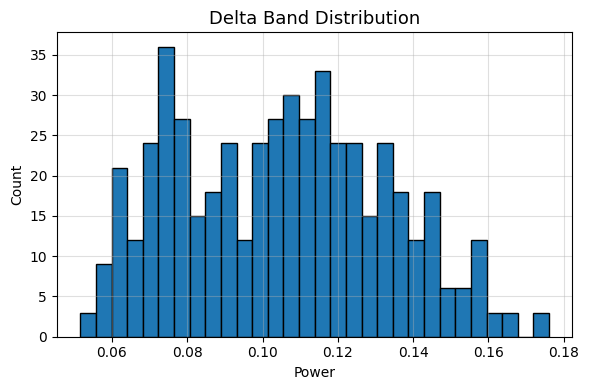

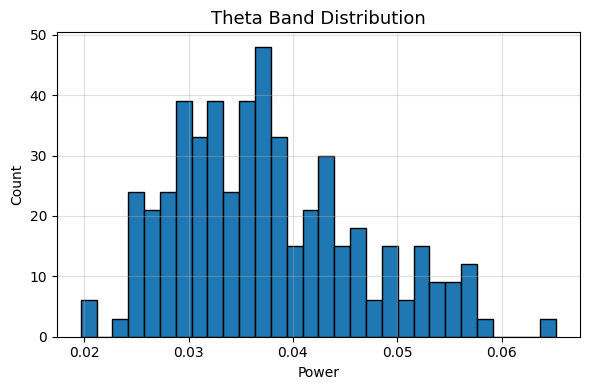

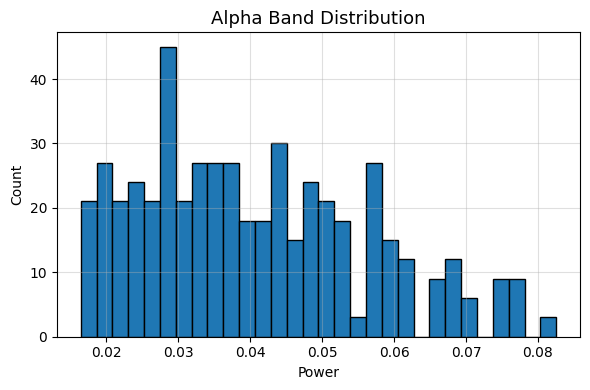

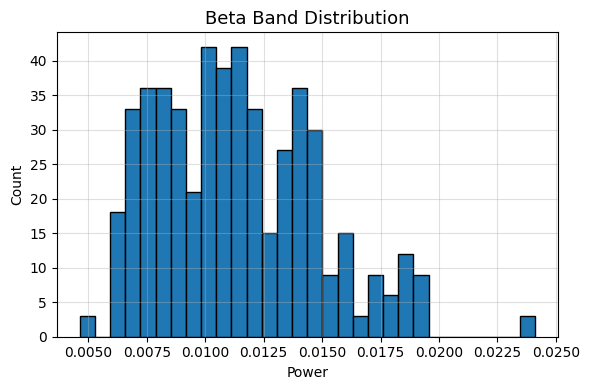

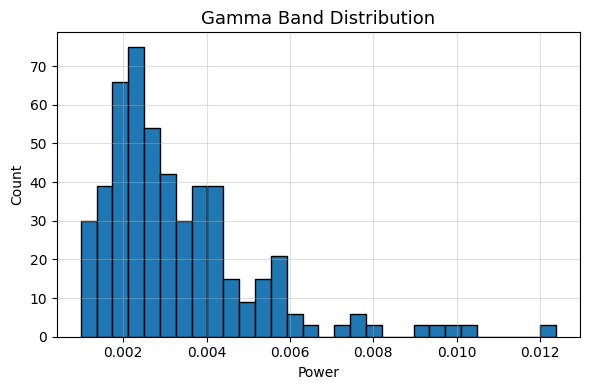

In [7]:
SAVE_DIR = r"C:\Users\Ale\Downloads\Jade\Ale\Jade_Saves\EDA_plots"
os.makedirs(SAVE_DIR, exist_ok=True)
bands = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]

for band in bands:
    plt.figure(figsize=(6, 4))
    plt.hist(df[band], bins=30, edgecolor="black")
    plt.title(f"{band} Band Distribution", fontsize=13)
    plt.xlabel("Power")
    plt.ylabel("Count")
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.savefig(os.path.join(SAVE_DIR, f"{band}_distribution.png"), dpi=300)

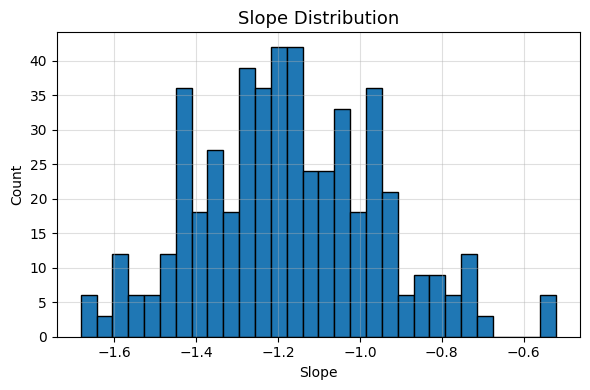

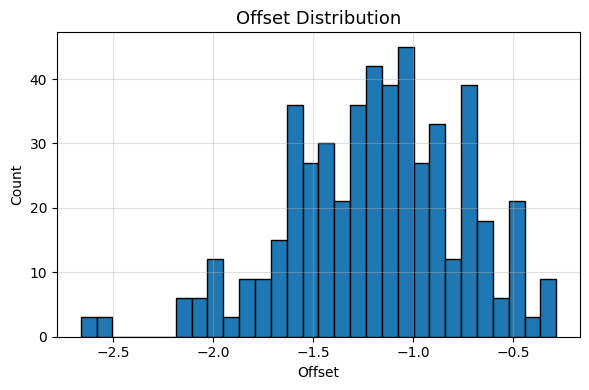

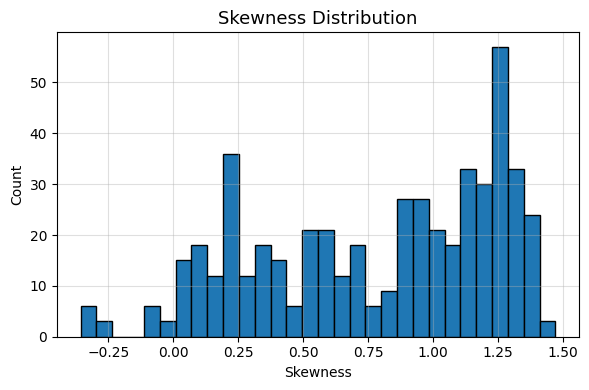

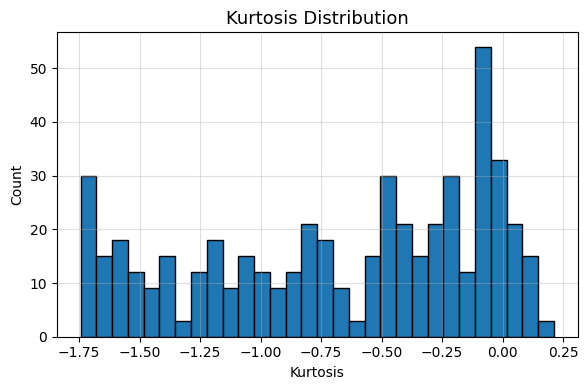

In [8]:
stats = ["Slope", "Offset", "Skewness", "Kurtosis"]

for feat in stats:
    plt.figure(figsize=(6, 4))
    plt.hist(df[feat], bins=30, edgecolor="black")
    plt.title(f"{feat} Distribution", fontsize=13)
    plt.xlabel(feat)
    plt.ylabel("Count")
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.savefig(os.path.join(SAVE_DIR, f"{feat}_distribution.png"), dpi=300)
    

# Relation with Age variable

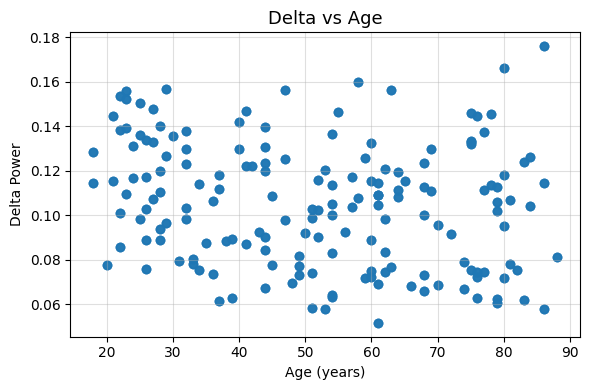

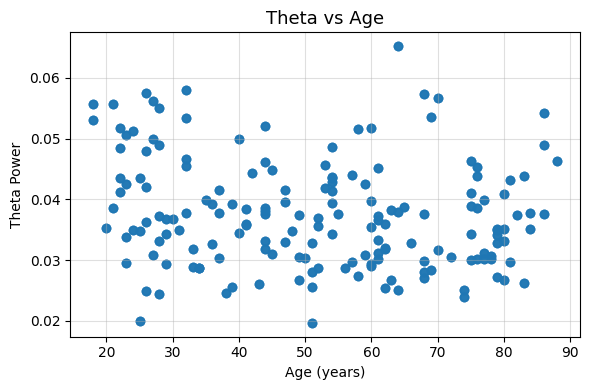

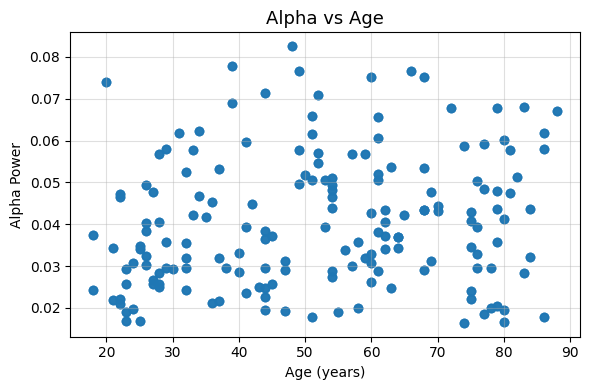

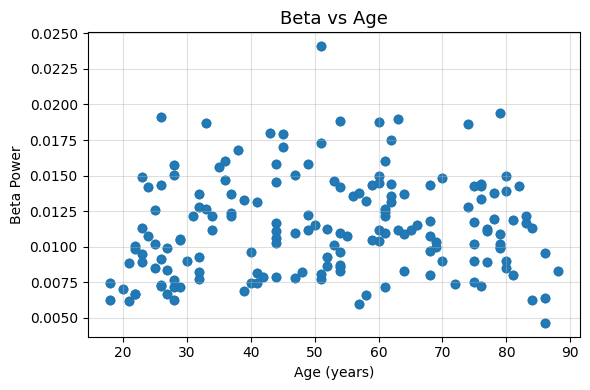

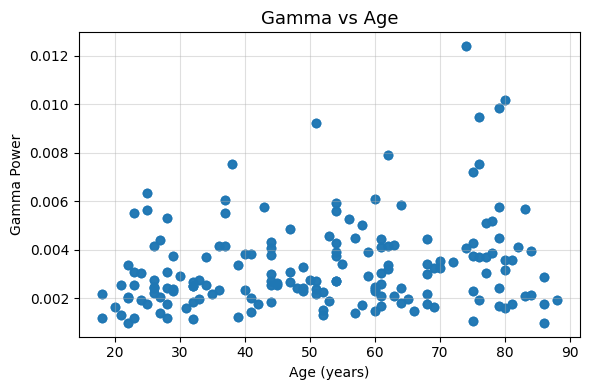

In [9]:
for band in bands:
    plt.figure(figsize=(6, 4))
    plt.scatter(df["Age"], df[band], alpha=0.7)
    plt.title(f"{band} vs Age", fontsize=13)
    plt.xlabel("Age (years)")
    plt.ylabel(f"{band} Power")
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.savefig(os.path.join(SAVE_DIR, f"{band}_vs_age.png"), dpi=300)

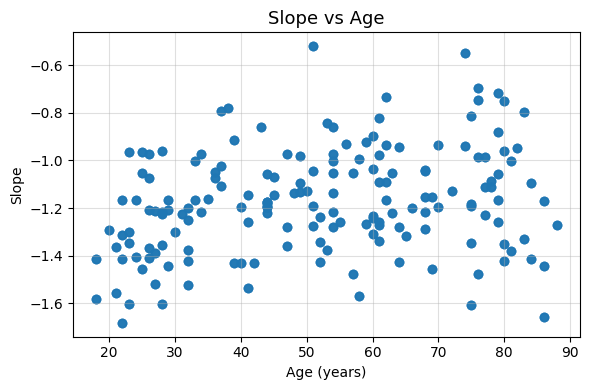

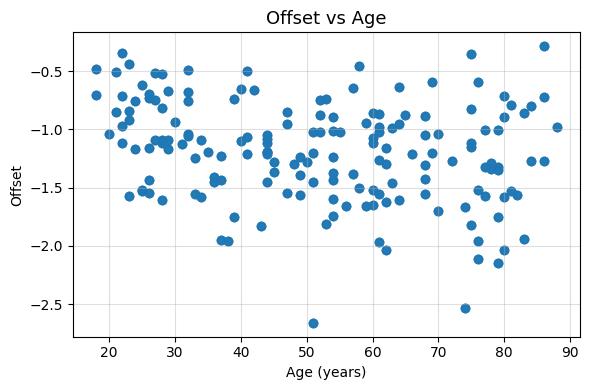

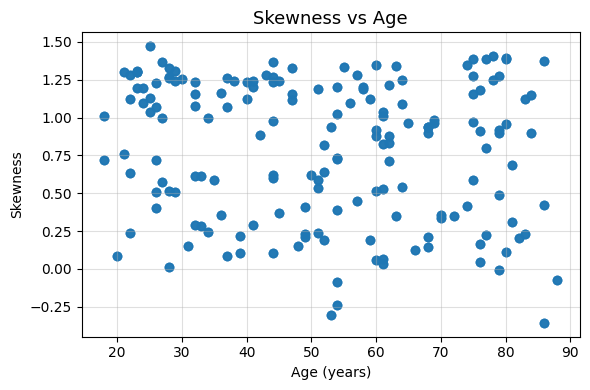

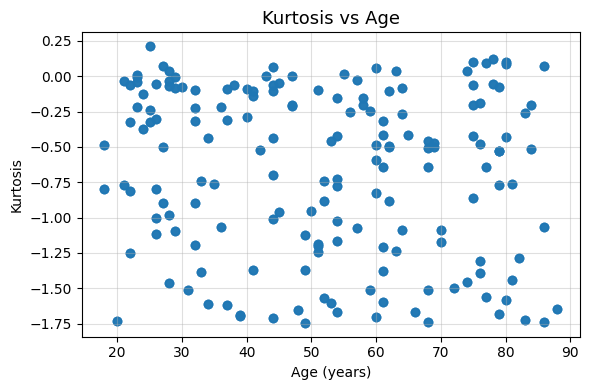

In [10]:
for feat in stats:
    plt.figure(figsize=(6, 4))
    plt.scatter(df["Age"], df[feat], alpha=0.7)
    plt.title(f"{feat} vs Age", fontsize=13)
    plt.xlabel("Age (years)")
    plt.ylabel(feat)
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.savefig(os.path.join(SAVE_DIR, f"{feat}_vs_age.png"), dpi=300)
    

### Correlation Matrix

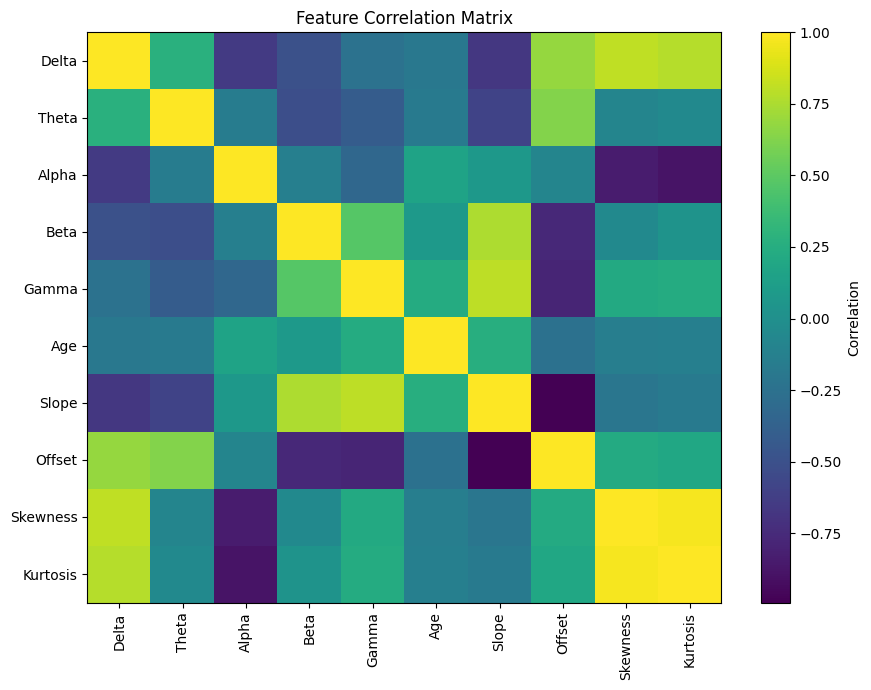

In [11]:
corr = df.corr()

plt.figure(figsize=(9, 7))
plt.imshow(corr, aspect="auto")
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "correlation_matrix.png"), dpi=300)
